# Introduction to Machine Learning - Exercise 8
Goal of the excercise is to learn how to use Scikit-learn library for a classification tasks and evaluate the performance of the proposed models.

![meme04](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_08_meme_04.jpg?raw=true)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder

## Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Useful links
* Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
* Metrics https://scikit-learn.org/stable/modules/model_evaluation.html
* K-Fold CV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
* Random forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# 🎯 What is our goal for this dataset?
* 🔎 What are the input features?
* 🔎 What is the output?
* 🔎 What should the model do?

## Load the titanic.csv dataset first

In [2]:
df = pd.read_csv('https://github.com/rasvob/EFREI-Introduction-to-Machine-Learning/raw/refs/heads/main/datasets/titanic.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 📊 Each task starts with basic exploration of the data

## How many passangers survived?
* Are the labels balanced?

In [3]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


# 💡 We need to pre-process the data first before training any ML model
* We want to use only numerical attributes as a model features
* Certain attributes need to be dropped and some of them can be encoded

![meme01](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_08_meme_01.jpg?raw=true)

## Which features could be encoded and which methods would you use?

In [4]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [5]:
df.describe(include=np.number)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## How many values are missing in the individual attributes?

In [6]:
df.isna().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0
Fare,0


# 🔎 Which features would you drop and why?

## Let's drop Name and Ticket features - these have no use for us now

In [7]:
df = df.drop(['Name', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


# 🚤 Extract the deck identifier from the Cabin feature
* 💡 A = top deck, G = lowest deck
  
1) Change type to string
   
2) Filter the first letter using *apply* function
   
3) If the value is *nan* use *U* value as an replacement - this will mark the passangers with missing Cabin value
   
4) Replace the T value with A

In [8]:
df.Cabin = df.Cabin.astype(str).apply(lambda x: x[0] if x != 'nan' else 'U').replace({'T': 'A'})

In [9]:
df.Cabin.value_counts()

,count
Cabin,
U,687
C,59
B,47
D,33
E,32
A,16
F,13
G,4


# ⚠ The Age feature is tricky, we have multiple solutions for dealing with missing values, e.g.:

1) Drop the feature

2) Take the mean/median value to replace the missing value

3) Take a random list of ages that maintains the original statistical summary values

4) Use a model to predict values based on the existing values

## We will use the second option ✌

## Check the boxplot *before* and *after* the replacement
* 🔎 Is there any change?

Text(0.5, 1.0, 'Before')

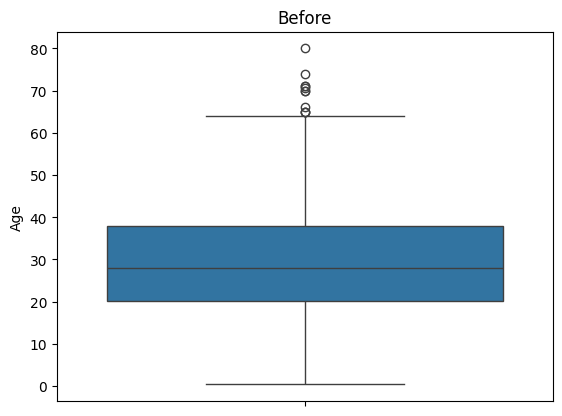

In [10]:
sns.boxplot(y=df.Age).set_title('Before')

In [11]:
df.Age = df.Age.fillna(df.Age.mean())

Text(0.5, 1.0, 'After')

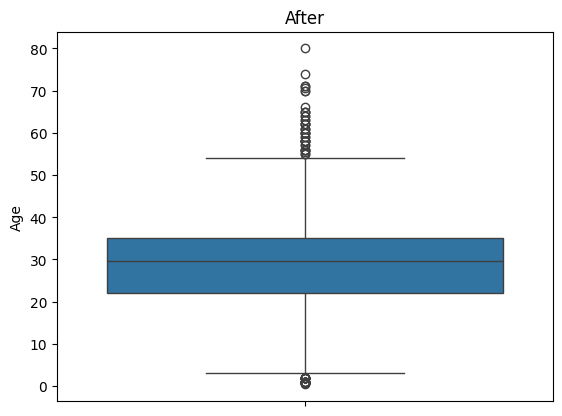

In [12]:
sns.boxplot(y=df.Age).set_title('After')

## Two passangers don't have the *Embarked* feature filled - we can drop these two rows

In [13]:
df = df.dropna()

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,U,S
2,1,1,female,38.000000,1,0,71.2833,C,C
3,1,3,female,26.000000,0,0,7.9250,U,S
4,1,1,female,35.000000,1,0,53.1000,C,S
5,0,3,male,35.000000,0,0,8.0500,U,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,U,S
888,1,1,female,19.000000,0,0,30.0000,B,S
889,0,3,female,29.699118,1,2,23.4500,U,S


## The last step of the pre-processing pipeline is to encode *Sex*, *Cabin* and *Embarked* features 👊
* We will use one-hot encoding for *Sex* and *Embarked* and Ordinal encoding for Cabin
* Specify the encoding scheme for the ordinal encoding using an array in a form ['first', 'second', 'third', ...]

In [15]:
cabin_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']
enc_cabin = OrdinalEncoder(categories=[cabin_categories])
enc_cabin.fit_transform(df[['Cabin']])[:, 0][:10]

array([7., 2., 7., 2., 7., 7., 4., 7., 7., 7.])

## Encode *Cabin* feature

In [16]:
df.loc[:, 'Cabin'] = enc_cabin.fit_transform(df[['Cabin']])[:, 0]

## Encode *Sex* feature

In [17]:
sex_categories = ['male', 'female']
enc_sex = OrdinalEncoder(categories=[sex_categories])
df.loc[:, 'Sex'] = enc_sex.fit_transform(df[['Sex']])[:, 0]

## Check the results

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0.0,22.0,1,0,7.2500,7.0,S
2,1,1,1.0,38.0,1,0,71.2833,2.0,C
3,1,3,1.0,26.0,0,0,7.9250,7.0,S
4,1,1,1.0,35.0,1,0,53.1000,2.0,S
5,0,3,0.0,35.0,0,0,8.0500,7.0,S


## The final step is to encode the *Embarked* using a one-hot encoding

In [19]:
pd.get_dummies(df['Embarked'], prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,True
889,False,False,True


## Concat the original `df` with a `pd.get_dummies` encoding result

In [20]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1).drop('Embarked', axis=1)

# The dataset is finally ready for the machine learning model training! 😍
* Let's take a one last look if everything is OK and we are good to go!

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,0.0,22.000000,1,0,7.2500,7.0,False,False,True
2,1,1,1.0,38.000000,1,0,71.2833,2.0,True,False,False
3,1,3,1.0,26.000000,0,0,7.9250,7.0,False,False,True
4,1,1,1.0,35.000000,1,0,53.1000,2.0,False,False,True
5,0,3,0.0,35.000000,0,0,8.0500,7.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.0,27.000000,0,0,13.0000,7.0,False,False,True
888,1,1,1.0,19.000000,0,0,30.0000,1.0,False,False,True
889,0,3,1.0,29.699118,1,2,23.4500,7.0,False,False,True


# 🚀 Let's start with splitting the data into the input and output part
* Usually named as a *X* and *y* variables
* What is the input and output?

In [22]:
X, y = df.loc[:, df.columns != 'Survived'], df.loc[:, 'Survived']

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0.0,22.0,1,0,7.2500,7.0,False,False,True
2,1,1.0,38.0,1,0,71.2833,2.0,True,False,False
3,3,1.0,26.0,0,0,7.9250,7.0,False,False,True
4,1,1.0,35.0,1,0,53.1000,2.0,False,False,True
5,3,0.0,35.0,0,0,8.0500,7.0,False,False,True


In [24]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


# We usually want to split the data into two sets called `train` and `test`
* 🔎 Why do we do that?
* Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 10), (178, 10), (711,), (178,))

# 🌳 Create the Decision tree classifier instance

In [26]:
clf = DecisionTreeClassifier()

## Use `fit()` method for training the classifier

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Lets use trained model for the prediction of the survival of the passenger
* 💡 Get predictions via the `predict()` method

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

# How can we evaluate our model?
* There are multiple metrics used: Accuracy, Recall, Precision, F1-Score, etc.
* 💡 Very useful is also creating a confusion matrix

# 🔎 How can we select the metric?
* 💡 Accuracy and F1-Score are the most universal metrics

## 🔎 When is **Accuracy** unsuitable?

![meme02](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_08_meme_02.jpg?raw=true)

# Take a look at this [article](https://builtin.com/data-science/precision-and-recall) and [wiki](https://en.wikipedia.org/wiki/Precision_and_recall) about precision and recall
* 💡 Beware the fact that as we increase precision, we decrease recall and vice-versa.

* **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.
    * The question that precision answer is of all passengers that labeled as survived, how many actually survived?
    * High precision relates to the low false positive rate.


* **Recall** is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
    * The question recall answers is: Of all the passengers that truly survived, how many did we label?

* **F1 Score** is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
    * Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
    * 💡 **F1 works best if false positives and false negatives have similar cost**
        * If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

$ConfMatrix = \begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}$

## Let's take a look at an example:
$|1| = 10$

$|0| = 90$

$M = \begin{bmatrix}
1 & 9\\
0 & 90
\end{bmatrix}$

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN} = \frac{1+90}{1+90+0+9} = \frac{91}{100} = 0.91$

$Precision = \frac{TP}{TP+FP} = \frac{1}{1+0} = 1$

$Recall = \frac{TP}{TP+FN} = \frac{1}{1+9} = \frac{1}{10} = 0.1$

$F1-Score = 2 \cdot \frac{Precision \cdot Recall}{Precision+Recall} = 2 \cdot \frac{1 \cdot 0.1}{1+0.1} = 2 \cdot \frac{0.1}{1.1} = 0.09$

In [29]:
accuracy_score(y_test, y_pred)

0.8314606741573034

## What does the confusion matrix tell us?
* 🔎 Where do we find true positives, false positives, etc?

In [30]:
print(df.columns.tolist())
candidate_drops = ['Name', 'Ticket']
print("Suggested drops:", candidate_drops)


['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
Suggested drops: ['Name', 'Ticket']


# 🚀 We can compute any metric that we wish

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix:\n", cm)
print("TP:", tp, "FP:", fp, "FN:", fn, "TN:", tn)

Confusion matrix:
 [[95 10]
 [20 53]]
TP: 53 FP: 10 FN: 20 TN: 95


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8314606741573034
Precision: 0.8412698412698413
Recall: 0.726027397260274
F1-score: 0.7794117647058824
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        73

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



# Can we improve our evaluation process?
* Lets try **cross-validation** process for the decision tree model
    * https://scikit-learn.org/stable/modules/cross_validation.html
* **What is the difference between Pure and Stratified K-Fold?**
    * 💡 Take a look at the survival ratio

In [33]:
survival_ratio = y.mean()
print("Overall survival ratio:", survival_ratio)
from sklearn.model_selection import KFold, StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=13)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
def show_split_ratios(splitter):
    ratios = []
    for train_idx, test_idx in splitter.split(X, y):
        ratios.append(y.iloc[test_idx].mean())
    return ratios
print("KFold test-fold survival ratios:", show_split_ratios(kf))
print("StratifiedKFold test-fold survival ratios:", show_split_ratios(skf))

Overall survival ratio: 0.38245219347581555
KFold test-fold survival ratios: [np.float64(0.4101123595505618), np.float64(0.38764044943820225), np.float64(0.3595505617977528), np.float64(0.42696629213483145), np.float64(0.327683615819209)]
StratifiedKFold test-fold survival ratios: [np.float64(0.38202247191011235), np.float64(0.38202247191011235), np.float64(0.38202247191011235), np.float64(0.38202247191011235), np.float64(0.384180790960452)]


## After the k-Fold CV is complete we usually want to compute statistics from the desired metric...

In [34]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state=13)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
cv_scores = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')
print("Stratified CV accuracies:", cv_scores)
print("Mean accuracy:", cv_scores.mean(), "Std:", cv_scores.std())

Stratified CV accuracies: [0.73595506 0.82022472 0.86516854 0.79775281 0.73446328]
Mean accuracy: 0.7907128800863328 Std: 0.05025254536550332


## ... or create a boxplot out of it 🔬

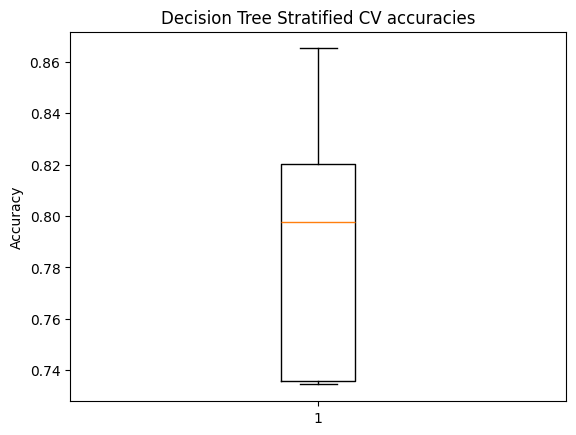

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(cv_scores)
plt.title("Decision Tree Stratified CV accuracies")
plt.ylabel("Accuracy")
plt.show()

# 📊 ML algorithms usually have hyper-parameters which change the behaviour of the model
* It is usually a good idea to check documentation 😊
    * https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* For the *DecisionTreeClassifier* a `max_depth` or `min_samples_split` are pretty important

* 🎯 The goal of the hyper-parameter tuning is to investigate the effect of the parameters on the model and ideally make the model better with setting the right parameters
    * Some models are more sensitive to parameters settings

## 🚀 Let's tune the `max_depth` first

In [36]:
depths = list(range(1, 21))
depth_scores = []
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=13)
    scores = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')
    depth_scores.append(scores.mean())
depth_df = pd.DataFrame({'max_depth': depths, 'cv_accuracy': depth_scores})
print(depth_df)

    max_depth  cv_accuracy
0           1     0.786238
1           2     0.771631
2           3     0.817736
3           4     0.807611
4           5     0.816606
5           6     0.809846
6           7     0.807599
7           8     0.815464
8           9     0.800838
9          10     0.799714
10         11     0.804215
11         12     0.798603
12         13     0.808716
13         14     0.799714
14         15     0.786231
15         16     0.800838
16         17     0.797454
17         18     0.790713
18         19     0.792960
19         20     0.792966


## Now we can plot the data
* 🔎 Which setting is the best?

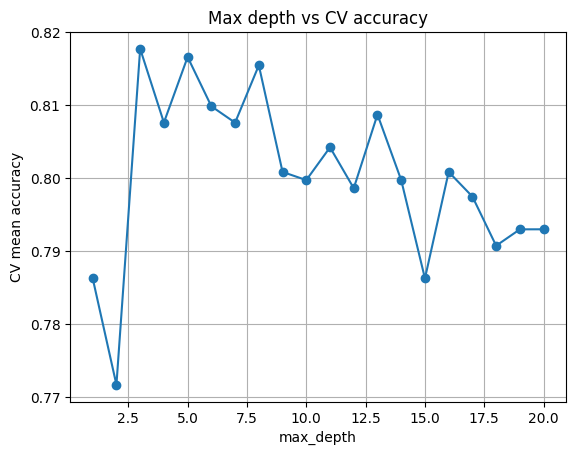

In [37]:
plt.figure()
plt.plot(depths, depth_scores, marker='o')
plt.title("Max depth vs CV accuracy")
plt.xlabel("max_depth")
plt.ylabel("CV mean accuracy")
plt.grid(True)
plt.show()

## 🚀 Now we can continue with `min_samples_split`

In [38]:
min_splits = [2, 5, 10, 20, 50, 100]
minsplit_scores = []
for m in min_splits:
    dt = DecisionTreeClassifier(min_samples_split=m, random_state=13)
    scores = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')
    minsplit_scores.append(scores.mean())
minsplit_df = pd.DataFrame({'min_samples_split': min_splits, 'cv_accuracy': minsplit_scores})
print(minsplit_df)

   min_samples_split  cv_accuracy
0                  2     0.790713
1                  5     0.799733
2                 10     0.810957
3                 20     0.815457
4                 50     0.801981
5                100     0.797505


### Which setting is the best?

In [39]:
best_depth = depth_df.loc[depth_df.cv_accuracy.idxmax()]
best_minsplit = minsplit_df.loc[minsplit_df.cv_accuracy.idxmax()]
print("Best depth:", best_depth.to_dict())
print("Best min_samples_split:", best_minsplit.to_dict())

Best depth: {'max_depth': 3.0, 'cv_accuracy': 0.8177363041960263}
Best min_samples_split: {'min_samples_split': 20.0, 'cv_accuracy': 0.8154573731987558}


## 🎯 So now we can try the combination of the best parameter-wise settings

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None] + list(range(2, 21)),
    'min_samples_split': [2, 5, 10, 20, 50]
}
gs = GridSearchCV(DecisionTreeClassifier(random_state=13), param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("GridSearch best params:", gs.best_params_)
print("GridSearch best CV score:", gs.best_score_)

GridSearch best params: {'max_depth': 11, 'min_samples_split': 10}
GridSearch best CV score: 0.8058898847631241


### 🔎 Is the model now better than the *default* one?

## Alternatively we can tune both parameters at once 😇

In [41]:
best_dt = gs.best_estimator_
best_dt.fit(X_train, y_train)
y_pred_best_dt = best_dt.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Test Accuracy (best DT):", accuracy_score(y_test, y_pred_best_dt))
print("Test Precision (best DT):", precision_score(y_test, y_pred_best_dt, zero_division=0))
print("Test Recall (best DT):", recall_score(y_test, y_pred_best_dt, zero_division=0))
print("Test F1 (best DT):", f1_score(y_test, y_pred_best_dt, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_best_dt))

Test Accuracy (best DT): 0.8314606741573034
Test Precision (best DT): 0.9387755102040817
Test Recall (best DT): 0.6301369863013698
Test F1 (best DT): 0.7540983606557377
Confusion matrix:
 [[102   3]
 [ 27  46]]


## And try the best combination again 😊
* 💡You don't have to write these codes by hand, sklearn already provides function for it
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=13)
rf_default.fit(X_train, y_train)
y_pred_rf_def = rf_default.predict(X_test)
acc_rf_def = accuracy_score(y_test, y_pred_rf_def)
f1_rf_def = f1_score(y_test, y_pred_rf_def, zero_division=0)
print("RandomForest default Test Accuracy:", acc_rf_def)
print("RandomForest default Test F1:", f1_rf_def)

dt_default = DecisionTreeClassifier(random_state=13)
dt_default.fit(X_train, y_train)
y_pred_dt_def = dt_default.predict(X_test)
acc_dt_def = accuracy_score(y_test, y_pred_dt_def)
f1_dt_def = f1_score(y_test, y_pred_dt_def, zero_division=0)
print("DecisionTree default Test Accuracy:", acc_dt_def)
print("DecisionTree default Test F1:", f1_dt_def)

RandomForest default Test Accuracy: 0.8202247191011236
RandomForest default Test F1: 0.7538461538461538
DecisionTree default Test Accuracy: 0.8202247191011236
DecisionTree default Test F1: 0.7647058823529411


# ✅ Task
* Take a look at the different models in the sklearn
    * https://scikit-learn.org/stable/supervised_learning.html
* Choose one model that you want to try, check how it works and what hyperparameters are the most important
    * You know some of them from the the lectures but you can also check online tutorials, blogs or YouTube 🙂
* Use the model in default settings
* Tune at least one of the hyper-parameters and compare the model proposed during the lecture and the one you just created
    * Beat the default `DecisionTreeClassifier`

![meme03](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/fml_08_meme_03.jpg?raw=true)

In [43]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=13), param_grid_rf, cv=skf, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)
print("RF GridSearch best params:", gs_rf.best_params_)
print("RF GridSearch best CV score:", gs_rf.best_score_)
best_rf = gs_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, zero_division=0)
print("Best RF Test Accuracy:", acc_best_rf)
print("Best RF Test F1:", f1_best_rf)
print("Confusion matrix (Best RF):\n", confusion_matrix(y_test, y_pred_best_rf))

RF GridSearch best params: {'max_depth': 10, 'n_estimators': 200}
RF GridSearch best CV score: 0.8325815030040383
Best RF Test Accuracy: 0.8539325842696629
Best RF Test F1: 0.7903225806451613
Confusion matrix (Best RF):
 [[103   2]
 [ 24  49]]


In [44]:
acc_best_dt = accuracy_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt, zero_division=0)
print("Best DecisionTree Test Accuracy:", acc_best_dt)
print("Best DecisionTree Test F1:", f1_best_dt)
print("Best RandomForest Test Accuracy:", acc_best_rf)
print("Best RandomForest Test F1:", f1_best_rf)
if acc_best_rf > acc_best_dt:
    winner = "RandomForest"
elif acc_best_rf < acc_best_dt:
    winner = "DecisionTree"
else:
    winner = "Tie on accuracy"
print("Winner by accuracy:", winner)

Best DecisionTree Test Accuracy: 0.8314606741573034
Best DecisionTree Test F1: 0.7540983606557377
Best RandomForest Test Accuracy: 0.8539325842696629
Best RandomForest Test F1: 0.7903225806451613
Winner by accuracy: RandomForest


In [45]:
try:
    importances = best_rf.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print(feat_imp)
except Exception as e:
    print("Could not compute feature importances:", e)

Sex           0.284075
Fare          0.214258
Age           0.204022
Pclass        0.094221
Cabin         0.068518
SibSp         0.053057
Parch         0.041938
Embarked_C    0.017017
Embarked_S    0.015365
Embarked_Q    0.007529
dtype: float64


The Random Forest model tuned with GridSearchCV selected the hyperparameters max_depth = 10 and n_estimators = 200, which achieved the best cross-validation score of 0.8326, indicating strong performance across multiple folds.

When evaluated on the test set, the tuned Random Forest achieved:

Accuracy: 0.8539

F1-Score: 0.7903

These scores are higher than those of the tuned Decision Tree (Accuracy = 0.8315, F1 = 0.7541), confirming that the Random Forest generalizes better.

The confusion matrix

[[103   2]
 [ 24  49]]


shows that the model correctly identifies most non-survivors (TN = 103) and survivors (TP = 49), while maintaining a very low number of false positives (2). The majority of errors arise from false negatives (24), meaning some true survivors were misclassified.

Feature importance analysis shows that the most influential variables for predicting survival are:

Sex (0.284)

Fare (0.214)

Age (0.204)

Pclass (0.094)

This confirms well-known survival patterns on the Titanic: women, younger passengers, wealthier passengers, and upper-class travelers had significantly higher chances of survival.